<a href="https://colab.research.google.com/github/Sanarazaaa/Mental-Disorder-Classification-Using-Random-Forest/blob/main/Mental_Disorder_Classification_Using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


df = pd.read_excel("/content/Mental disorder symptoms.xlsx")


df = df.dropna().drop_duplicates()


X = df.drop('Disorder', axis=1)
y = df['Disorder']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9130434782608695

Classification Report:
                       precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00         4
                 ASD       1.00      1.00      1.00         3
          Loneliness       1.00      1.00      1.00         1
                 MDD       0.50      0.50      0.50         2
                 OCD       1.00      1.00      1.00         1
                 PDD       0.50      0.50      0.50         2
                PTSD       1.00      1.00      1.00         2
            anexiety       1.00      1.00      1.00         2
             bipolar       1.00      1.00      1.00         1
     eating disorder       1.00      1.00      1.00         2
psychotic deprission       1.00      1.00      1.00         1
   sleeping disorder       1.00      1.00      1.00         2

            accuracy                           0.91        23
           macro avg       0.92      0.92      0.92        23
        weight

In [3]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print("CV mean accuracy:", cv_scores.mean())


CV mean accuracy: 0.9300395256916996


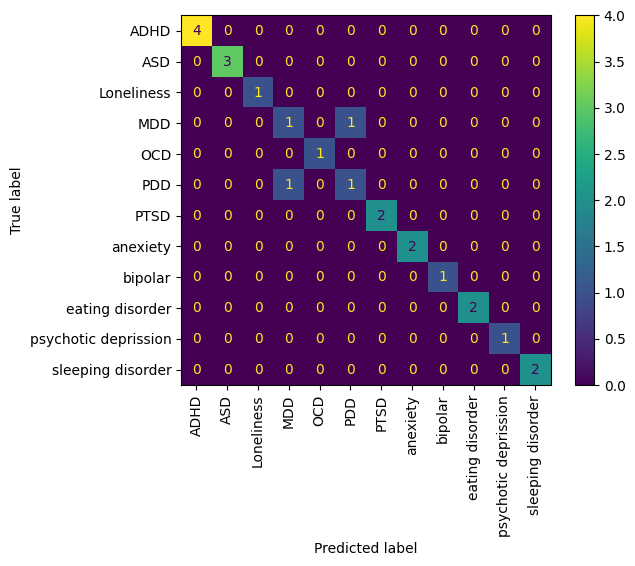

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, xticks_rotation=90)


Test Accuracy: 0.9318181818181818

Classification Report:
                       precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00         3
                 ASD       1.00      1.00      1.00         4
          Loneliness       1.00      1.00      1.00         4
                 MDD       0.80      1.00      0.89         4
                 OCD       1.00      0.75      0.86         4
                 PDD       1.00      0.75      0.86         4
                PTSD       1.00      0.75      0.86         4
            anexiety       1.00      1.00      1.00         4
             bipolar       0.75      1.00      0.86         3
     eating disorder       1.00      1.00      1.00         3
psychotic deprission       1.00      1.00      1.00         3
   sleeping disorder       0.80      1.00      0.89         4

            accuracy                           0.93        44
           macro avg       0.95      0.94      0.93        44
        w

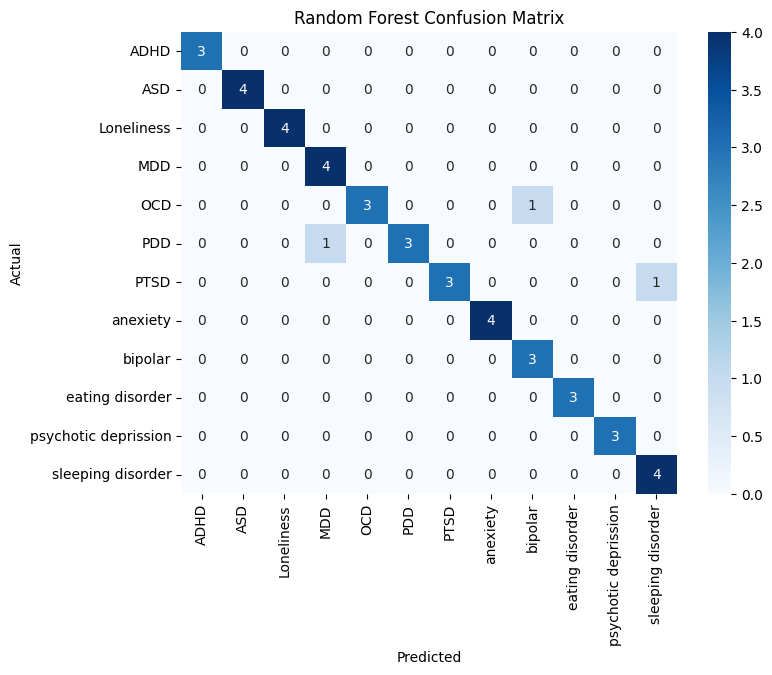

Cross-validation mean accuracy: 0.9584566596194503

Top 10 Important Features:
 introvert                      0.063457
increased.energy               0.059464
feeling.negative               0.052636
having.trouble.in.sleeping     0.051442
popping.up.stressful.memory    0.050826
avoids.people.or.activities    0.050480
close.friend                   0.048547
trouble.concentrating          0.046388
trouble.in.concentration       0.043227
hopelessness                   0.042488
dtype: float64


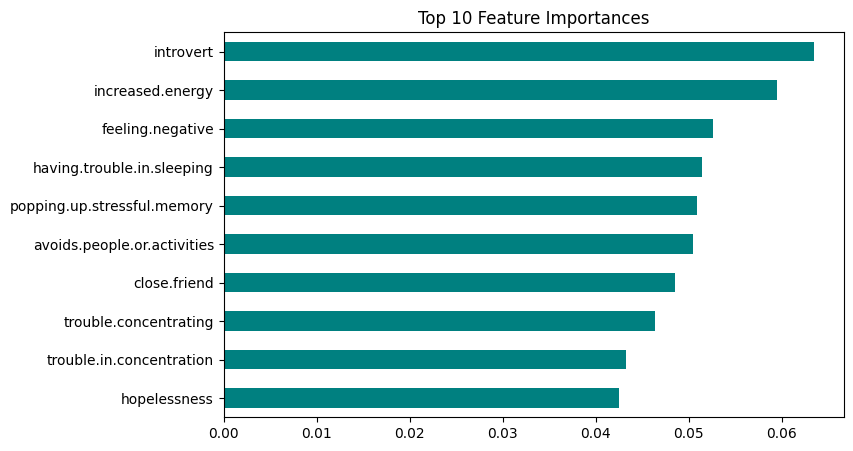


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Score: 0.9675475687103594


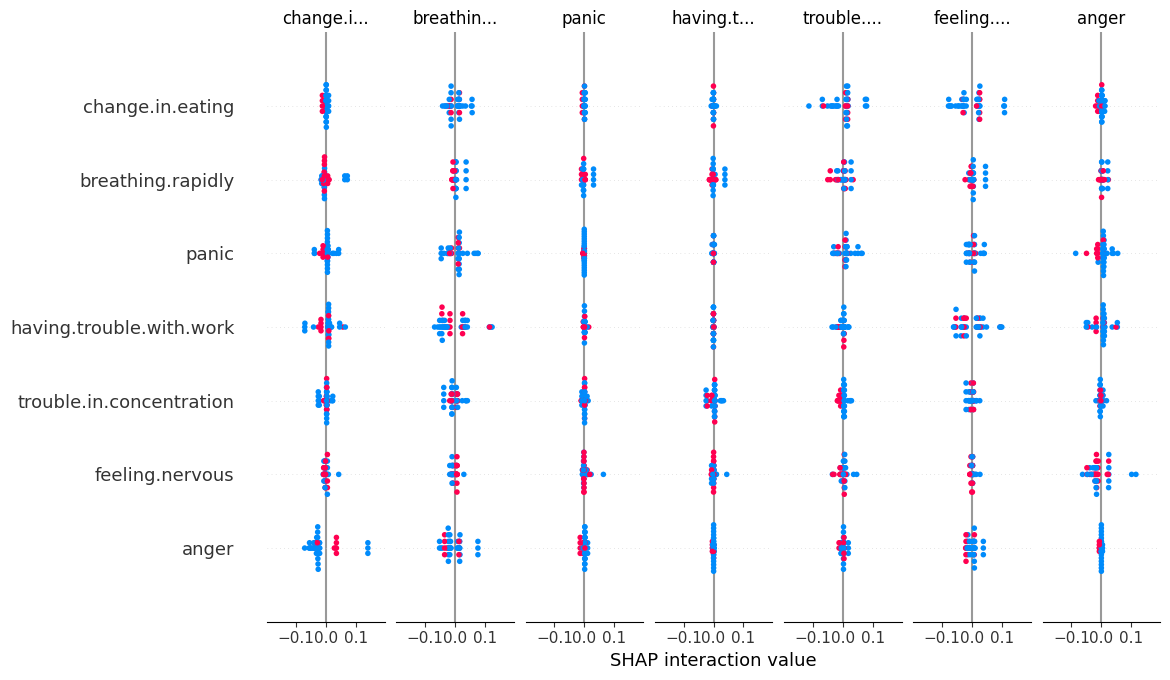

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

smote = SMOTE(random_state=42, k_neighbors=4)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

model = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight="balanced"
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print("Cross-validation mean accuracy:", cv_scores.mean())

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", feature_importance.head(10))
plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind="barh", color="teal")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid.fit(X_resampled, y_resampled)
print("\nBest Hyperparameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:00:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.9545454545454546

Classification Report:
                       precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00         3
                 ASD       1.00      1.00      1.00         4
          Loneliness       1.00      1.00      1.00         4
                 MDD       0.80      1.00      0.89         4
                 OCD       1.00      0.75      0.86         4
                 PDD       1.00      0.75      0.86         4
                PTSD       1.00      1.00      1.00         4
            anexiety       1.00      1.00      1.00         4
             bipolar       0.75      1.00      0.86         3
     eating disorder       1.00      1.00      1.00         3
psychotic deprission       1.00      1.00      1.00         3
   sleeping disorder       1.00      1.00      1.00         4

            accuracy                           0.95        44
           macro avg       0.96      0.96      0.96        44
        w

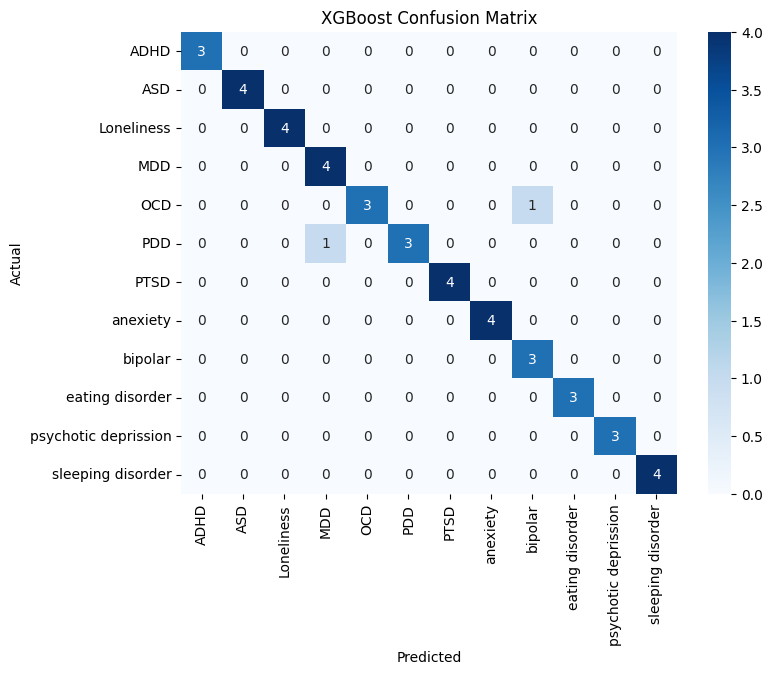

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:00:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:00:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:00:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:00:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:00:09] WARNING: /w

Cross-validation mean accuracy: 0.9585623678646934

Top 10 Important Features:
 hallucinations                 0.108143
change.in.eating               0.094552
hopelessness                   0.079108
having.nightmares              0.078024
sweating                       0.067684
close.friend                   0.063324
increased.energy               0.060909
introvert                      0.058094
avoids.people.or.activities    0.054081
trouble.in.concentration       0.043476
dtype: float32


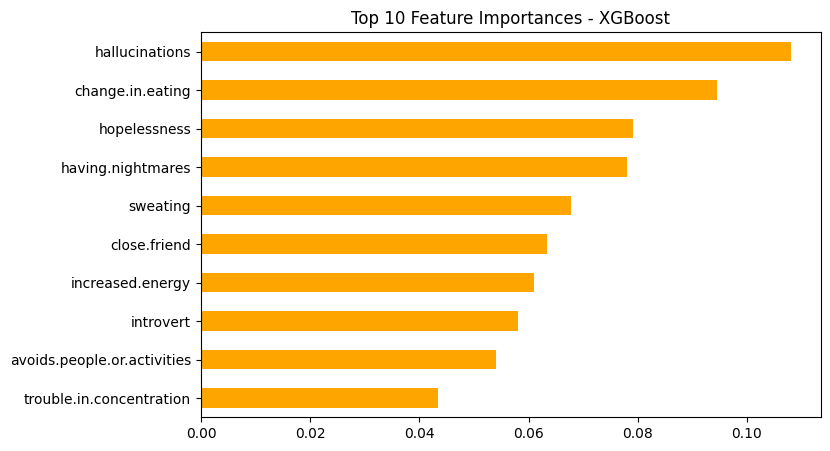

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:02:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best CV Score: 0.9676532769556025


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


# 1. Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=4)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 2. Encode target variable
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled) # Encode y_resampled

# 3. Train-test split
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split( # Use encoded y
    X_resampled, y_resampled_encoded, test_size=0.2, random_state=42, stratify=y_resampled_encoded # Stratify using encoded y
)

# 4. XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",  # for multi-class classification
    num_class=len(set(y_resampled_encoded)),      # number of classes
    eval_metric="mlogloss",
    random_state=42,
    use_label_encoder=False
)

# 5. Train
xgb_model.fit(X_train, y_train_encoded) # Train with encoded y

# 6. Predictions
y_pred_encoded = xgb_model.predict(X_test) # Predict encoded labels
y_pred = label_encoder.inverse_transform(y_pred_encoded) # Inverse transform to get original labels


print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred_encoded)) # Use encoded y_test for accuracy
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder.classes_)) # Use encoded y_test and target_names from label_encoder for classification report

# 7. Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded) # Use encoded y_test and y_pred for confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, # Use label_encoder.classes_ for xticklabels
            yticklabels=label_encoder.classes_) # Use label_encoder.classes_ for yticklabels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# 8. Cross-validation
cv_scores = cross_val_score(xgb_model, X_resampled, y_resampled_encoded, cv=5) # Use encoded y_resampled for cross-validation
print("Cross-validation mean accuracy:", cv_scores.mean())

# 9. Feature importance
importances = xgb_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", feature_importance.head(10))

plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind="barh", color="orange")
plt.title("Top 10 Feature Importances - XGBoost")
plt.gca().invert_yaxis()
plt.show()

# 10. Hyperparameter tuning (optional, can take time)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
grid = GridSearchCV(
    xgb.XGBClassifier(objective="multi:softmax", num_class=len(set(y_resampled_encoded)), eval_metric="mlogloss", use_label_encoder=False), # Use encoded y_resampled
    param_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid.fit(X_resampled, y_resampled_encoded) # Fit with encoded y_resampled
print("\nBest Hyperparameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)